In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Position_Salaries.csv")
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [3]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [7]:
y = y.reshape(len(y),1)

In [8]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [9]:
from sklearn.preprocessing import StandardScaler
scX = StandardScaler()
scY = StandardScaler()
x = scX.fit_transform(x)
y = scY.fit_transform(y)

In [10]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [11]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [12]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [15]:
x_test = [[6.5]]
y_predicted = scY.inverse_transform(regressor.predict(scX.transform(x_test)).reshape(-1,1))


In [16]:
print(y_predicted)

[[170370.0204065]]


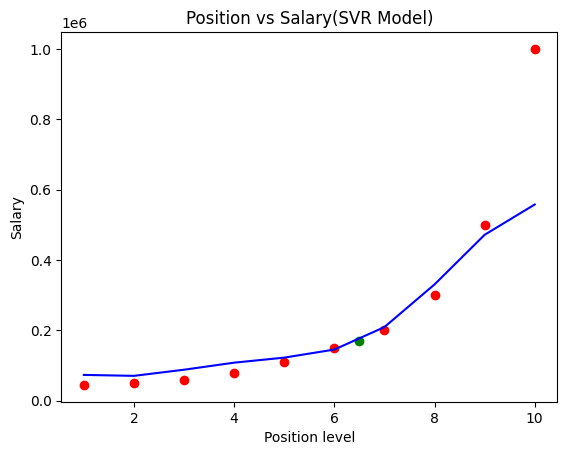

In [21]:
plt.scatter(scX.inverse_transform(x),scY.inverse_transform(y),color='red')
plt.plot(scX.inverse_transform(x),scY.inverse_transform(regressor.predict(x).reshape(-1,1)),color = 'blue')
plt.scatter(x_test,y_predicted,color = 'green')
plt.title("Position vs Salary(SVR Model)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

<ipython-input-28-f5c47320abca>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xGrid = np.arange(min(scX.inverse_transform(x)),max(scX.inverse_transform(x)),0.1)


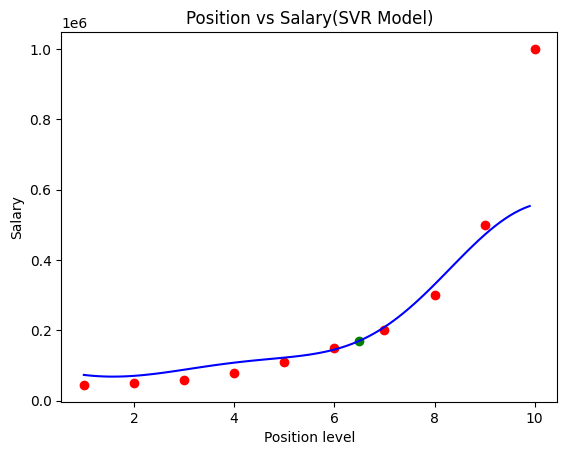

In [28]:
xGrid = np.arange(min(scX.inverse_transform(x)),max(scX.inverse_transform(x)),0.1)
xGrid = xGrid.reshape(len(xGrid),1)
plt.scatter(scX.inverse_transform(x),scY.inverse_transform(y),color= 'red')
plt.plot(xGrid,scY.inverse_transform(regressor.predict(scX.transform(xGrid)).reshape(-1,1)),color = 'blue')
plt.scatter(x_test,y_predicted,color = 'green')
plt.title("Position vs Salary(SVR Model)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()
